# Vizualized model

`ABSESpy` provides a basic visualization of the model. The visualization is based on the `matplotlib`, `xarray`, `geopandas`, and `networkx` library. The visualization is not perfect, but it can help to understand the model structure.

## Grid world

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

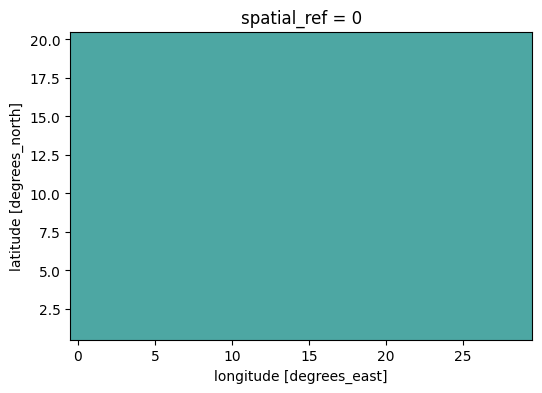

In [1]:
import abses

model = abses.main.MainModel()
module = model.nature.create_module("from_resolution", shape=(20, 30))
module.plot.show()

<Axes: xlabel='test', ylabel='Count'>

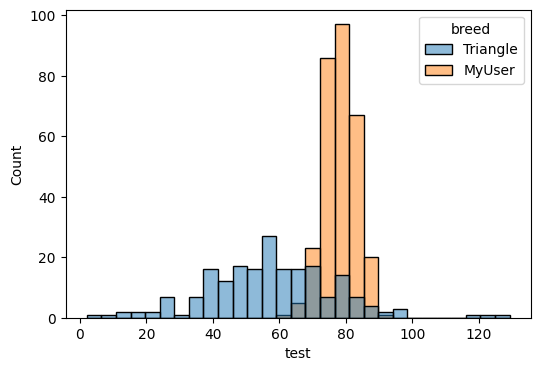

In [2]:
from abses import Actor


class Triangle(Actor):
    marker = "^"
    color = "red"

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.test = self.random.normalvariate(60, 20)


class MyUser(Actor):
    marker = "user"
    color = "#FF0000"

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.test = self.random.normalvariate(78, 5)


new_agents = module.random.new(Triangle, num=200)
new_users = module.random.new(MyUser, num=300)

model.actors.plot.hist("test")

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

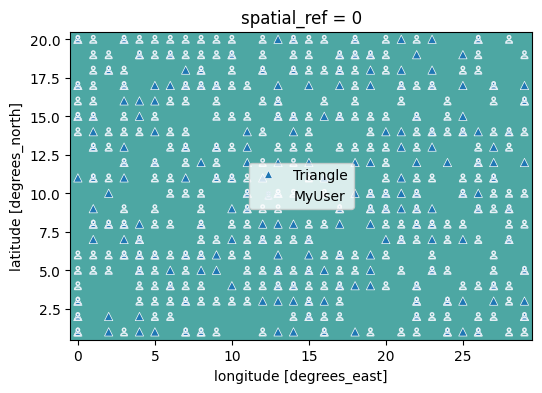

In [3]:
module.plot.show()

## Real-world map

In this section, we will visualize the real-world map of the model.

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='x', ylabel='y'>

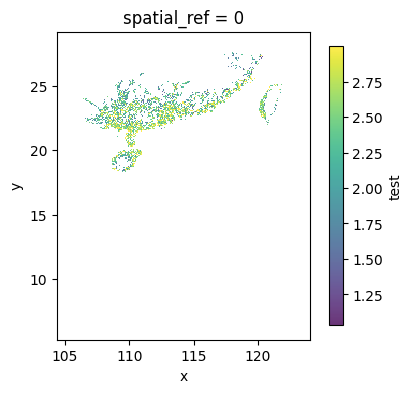

In [4]:
from abses import MainModel

sc = MainModel()
cropland = sc.nature.create_module(
    "from_file",
    raster_file="data/farmland.tif",
    apply_raster=True,
    name="cropland",
    attr_name="test",
)
cropland.plot.show("test")

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='x', ylabel='y'>

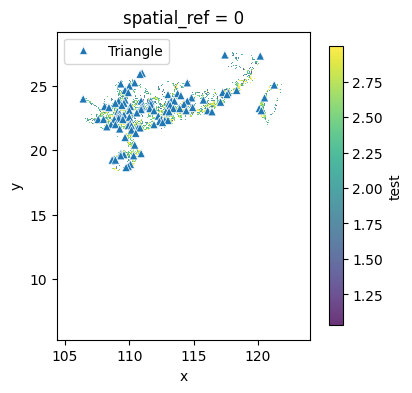

In [5]:
actors = cropland.random.new(Triangle, 100)
cropland.plot.show("test")